# Homicides In The USA

The Homicide rate in the USA is frequently ranked amoungst the highest in Western countries. What is the reason for this, is there a trend in when these rates rise? Does ecomnomic downturn have an effect on the homicide rates? Or is it the lax gun laws that make the levels of homicide higher?

Lets take a look at the homicide rates from the year 1980 to 2014 to get an idea:

In [1]:
#import libraries we need
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("database.csv") # read csv into dataframe

/Users/marthacleary/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Hmmm we are getting an error based on column number 16, lets take a closer look:

In [3]:
pd.unique(df['Perpetrator Sex']) # check unique values in this column 

array(['Male', 'Unknown', 'Female'], dtype=object)

It doesnt look as though there are mixed types but lets set the type to String for the column just in case:

In [4]:
df['Perpetrator Sex'].astype(str) # change this column type to string

0            Male
1            Male
2         Unknown
3            Male
4         Unknown
           ...   
638449    Unknown
638450       Male
638451     Female
638452       Male
638453     Female
Name: Perpetrator Sex, Length: 638454, dtype: object

In [5]:
df.head(5) # show the first 5 rows of the dataframe

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [6]:
df.info() #get an overview of our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [7]:
df.tail() # check the last 5 rows of dataframe

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI
638453,638454,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,...,Not Hispanic,Female,24,White,Not Hispanic,Daughter,Blunt Object,0,1,FBI


In [8]:
nRow, nCol = df.shape # find how many rows and columns in the dataframe
print(f'There are {nRow} rows and {nCol} columns')

There are 638454 rows and 24 columns


In [9]:
df_na = df[df.isna().any(axis=1)] # check for NaN values across entire dataframe
df_na.shape # how many rows and columns have NaNs

(0, 24)

In [10]:
df.isna().sum() # get the sum of NaN values in each column

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

Well it appears we have no NaN values, amazing! Lets go ahead and drop a few columns we will not be using:

In [11]:
df.drop(columns=['Record ID', 'Agency Code', 'Agency Name', 'Record Source', 'Incident'], inplace=True) #Drop these columns, Overwrite the previous DataFrame
df.shape 

(638454, 19)

In [12]:
print('Year with most cases of homicide is: ', df['Year'].value_counts().idxmax())
print('Month with most cases of homicide is: ', df['Month'].value_counts().idxmax())
print('City with most cases of homicide is: ', df['City'].value_counts().idxmax())
print('State with most cases of homicide is: ', df['State'].value_counts().idxmax())
print('Weapon used the most in homicide cases is: ', df['Weapon'].value_counts().idxmax())
# get an idea of max values in out dataframe

Year with most cases of homicide is:  1993
Month with most cases of homicide is:  July
City with most cases of homicide is:  Los Angeles
State with most cases of homicide is:  California
Weapon used the most in homicide cases is:  Handgun


For ease of working with this dataframe, i would like to change all column names to lower case and insert an underscore to avoid any future problems.

In [13]:
df = df.rename(columns=lambda x: x.replace(' ', '_').lower()) # rename the columns, replace spaces with an underscore, make it all lower case 
df

,agency_type,city,state,year,month,crime_type,crime_solved,victim_sex,victim_age,victim_race,victim_ethnicity,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count
0,Municipal Police,Anchorage,Alaska,1980,January,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
2,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
3,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
4,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Sheriff,Park,Wyoming,2014,January,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0
638450,Sheriff,Sheridan,Wyoming,2014,June,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0
638451,Municipal Police,Sheridan,Wyoming,2014,September,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0
638452,Sheriff,Sublette,Wyoming,2014,December,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1


Since our Dataframe is quite large, I want to get an idea of the unique values in each column to check if we have anything that looks odd:

In [14]:
for col in df: #create a for loop to iterate through each column 
    print(df[col].unique()) #print only the unique values in each column 

['Municipal Police' 'County Police' 'State Police' 'Sheriff'
 'Special Police' 'Regional Police' 'Tribal Police']
['Anchorage' 'Juneau' 'Nome' ... 'Rooks' 'McCone' 'Antelope']
['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'District of Columbia' 'Delaware' 'Florida' 'Georgia'
 'Hawaii' 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky'
 'Louisiana' 'Massachusetts' 'Maryland' 'Maine' 'Michigan' 'Minnesota'
 'Missouri' 'Mississippi' 'Montana' 'Nebraska' 'North Carolina'
 'North Dakota' 'New Hampshire' 'New Jersey' 'New Mexico' 'Nevada'
 'New York' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhodes Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia'
 'Vermont' 'Washington' 'Wisconsin' 'West Virginia' 'Wyoming']
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014]
['January' 'March' 'April' 'May' 'June'

Okay, so I see a few unknown values which I assume are in columns where the crime remains unsolved so we will keep that in mind. There is one other thing I see that concerns me, in the 7th array up from the bottom I notice a ' ' value. Lets check it out

In [15]:
pd.unique(df['perpetrator_age']) # get the unique values from the Perpetrator Age column

array([15, 42, 0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25, 7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80, 9, 12, 81, 6, 87, 82, 83, 8, 84,
       85, 86, 5, 3, 1, 88, 95, 4, 91, 92, 96, 94, 2, 98, 97, '22', '52',
       '21', '0', '25', '61', '32', '28', '20', '38', '18', '17', '53',
       '30', '24', '84', '43', '16', '47', '54', '50', '42', '23', '36',
       '35', '60', '27', '19', '14', '57', '63', '81', '31', '58', '51',
       '15', '40', '33', '26', '41', '29', '34', '37', '69', '44', '48',
       '55', '49', '56', '39', '45', '65', '59', '70', '46', '11', '77',
       '67', '76', '85', '72', '13', '89', '74', '71', '64', '62', '3',
       '80', '73', '75', '83', '78', '68', '66', '86', '87', '95', '90',
       '6', '12', '99', '88', '9', '93', '10', 

Lets find that specific row now:

In [16]:
df.loc[df.perpetrator_age == ' '] # find the row where the value is ' '

,agency_type,city,state,year,month,crime_type,crime_solved,victim_sex,victim_age,victim_race,victim_ethnicity,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count
634666,Municipal Police,Tulsa,Oklahoma,2014,June,Murder or Manslaughter,No,Male,46,Black,Not Hispanic,Unknown,,Unknown,Unknown,Unknown,Handgun,0,0


Okay so we can now see the row with the missing data, and we can also see that the dtype for this column is an object. As this column represents age i want this column to be Int. So first lets replace our missing value: 

In [17]:
df['perpetrator_age'].replace(' ', 0, inplace=True)

Now lets take a look to check if that worked:

In [18]:
df.iloc[634666]

agency_type                    Municipal Police
city                                      Tulsa
state                                  Oklahoma
year                                       2014
month                                      June
crime_type               Murder or Manslaughter
crime_solved                                 No
victim_sex                                 Male
victim_age                                   46
victim_race                               Black
victim_ethnicity                   Not Hispanic
perpetrator_sex                         Unknown
perpetrator_age                               0
perpetrator_race                        Unknown
perpetrator_ethnicity                   Unknown
relationship                            Unknown
weapon                                  Handgun
victim_count                                  0
perpetrator_count                             0
Name: 634666, dtype: object

Excellent, Lets change that column to Integers now:

In [19]:
df['perpetrator_age'].astype(int)

0         15
1         42
2          0
3         42
4          0
          ..
638449     0
638450    57
638451    22
638452    31
638453    24
Name: perpetrator_age, Length: 638454, dtype: int64

In [20]:
df['count'] = 1
df.groupby(['perpetrator_age']).count()['count'] # Get a count for each unique value under the perp age column


perpetrator_age
0     211080
1         33
2          6
3         22
4         29
       ...  
90         3
92         1
93         1
95         1
99         3
Name: count, Length: 190, dtype: int64

Okay so it looks like the age of 0 is coming up for a few values which will have an impact on our analysis. I am wondering if this is for crimes that are unsolved! So Lets go to that column and check the unique values under crime_solved:

In [21]:
pd.unique(df['crime_solved'])

array(['Yes', 'No'], dtype=object)

Okay so i will want to do some statistical analysis on this column so lets change it from Yes and No, to 1 and 0:

In [22]:
value_conversion = {'No': 0, 'Yes':1} # change values from string to int
df['crime_solved'] = df['crime_solved'].map(value_conversion) # overwrite the column with the new info

Lets check that worked:

In [23]:
df['crime_solved']

0         1
1         1
2         0
3         1
4         0
         ..
638449    0
638450    1
638451    1
638452    1
638453    1
Name: crime_solved, Length: 638454, dtype: int64

In [24]:
pd.unique(df['crime_solved']) # find all unique values in this column

array([1, 0])

In [25]:
df['crime_solved'].value_counts(normalize=True) * 100 # get the relative frequencies for each unique value

1    70.196443
0    29.803557
Name: crime_solved, dtype: float64

Okay now that we have changed that lets take a look and see if those values where perpetrator age is 0 are those cases that are unsolved as we suspected:

In [26]:
df.loc[(df['perpetrator_age'] == '0') & (df['crime_solved'] == 1)] 
#find rows with potential missing data - where the crime is solved but the age is zero


,agency_type,city,state,year,month,crime_type,crime_solved,victim_sex,victim_age,victim_race,victim_ethnicity,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,count
622642,Municipal Police,Travis,Texas,2012,October,Murder or Manslaughter,1,Male,17,White,Hispanic,Male,0,White,Not Hispanic,Unknown,Unknown,0,0,1
622671,Municipal Police,Waller,Texas,2012,October,Murder or Manslaughter,1,Male,57,Black,Not Hispanic,Male,0,Black,Not Hispanic,Stranger,Handgun,0,0,1
622892,Municipal Police,Harris,Texas,2012,July,Murder or Manslaughter,1,Male,23,Black,Unknown,Male,0,White,Unknown,Stranger,Handgun,1,1,1
622899,Municipal Police,Harris,Texas,2012,January,Murder or Manslaughter,1,Male,31,Black,Not Hispanic,Male,0,Black,Not Hispanic,Stranger,Handgun,0,0,1
622919,Municipal Police,Harris,Texas,2012,February,Murder or Manslaughter,1,Male,22,Black,Not Hispanic,Male,0,Black,Not Hispanic,Stranger,Handgun,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638334,Municipal Police,Milwaukee,Wisconsin,2014,August,Murder or Manslaughter,1,Male,26,Black,Unknown,Male,0,Black,Unknown,Unknown,Handgun,0,1,1
638336,Municipal Police,Milwaukee,Wisconsin,2014,August,Murder or Manslaughter,1,Male,45,Black,Unknown,Male,0,Unknown,Unknown,Stranger,Handgun,0,1,1
638339,Municipal Police,Milwaukee,Wisconsin,2014,September,Murder or Manslaughter,1,Female,26,Black,Unknown,Male,0,Black,Unknown,Unknown,Handgun,0,0,1
638342,Municipal Police,Milwaukee,Wisconsin,2014,October,Murder or Manslaughter,1,Female,50,Black,Unknown,Male,0,Black,Unknown,Unknown,Handgun,0,0,1


Oh no, It would appear our suspicion was incorrect, which means we have a quite a bit of missing data for the perpetrator age. We will need to keep this in mind. 
Lets move on and fix some columns that are unclear. After digging into the meta data, While each row indicates an indivual homicide, Victim Count and Perpetrator count contain additional victims and perpetrators. So we need to add a 1 to every value in each of these columns to get an accurate count:

In [27]:
numeric_cols = ['victim_count', 'perpetrator_count'] 
df[numeric_cols] += 1 # add a one to each column in this variable
df

,agency_type,city,state,year,month,crime_type,crime_solved,victim_sex,victim_age,victim_race,victim_ethnicity,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,count
0,Municipal Police,Anchorage,Alaska,1980,January,Murder or Manslaughter,1,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,1,1,1
1,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,1,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,1,1,1
2,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,1,1,1
3,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,1,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,1,1,1
4,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Sheriff,Park,Wyoming,2014,January,Murder or Manslaughter,0,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,1,1
638450,Sheriff,Sheridan,Wyoming,2014,June,Murder or Manslaughter,1,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,1,1,1
638451,Municipal Police,Sheridan,Wyoming,2014,September,Murder or Manslaughter,1,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,1,1,1
638452,Sheriff,Sublette,Wyoming,2014,December,Murder or Manslaughter,1,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,1,2,1


In [28]:
pd.unique(df['victim_count']) # get the unique values 

array([ 1,  3,  2,  4,  7,  5,  6, 10,  8,  9, 11])

Great, no more 0 values. Lets move on to the perpetrator race column and take a look at its unique values:

In [29]:
pd.unique(df['perpetrator_race']) # get unique values 


array(['Native American/Alaska Native', 'White', 'Unknown', 'Black',
       'Asian/Pacific Islander'], dtype=object)

Hmmm some unknown values, lets see how many we are dealing with:

<AxesSubplot:ylabel='State'>

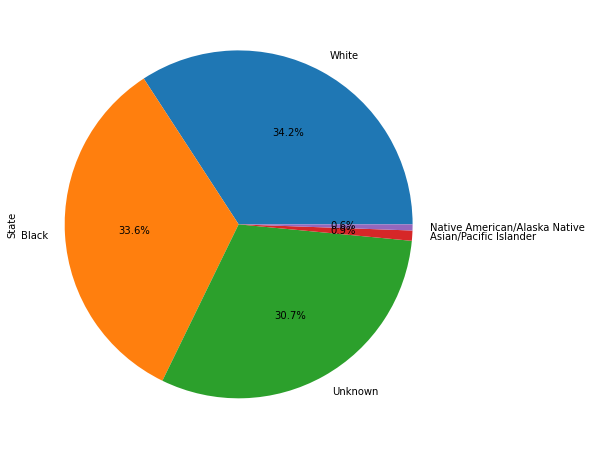

In [30]:
plt.figure(figsize=(18,8))
df.groupby('perpetrator_race').size().sort_values(ascending=False).plot(kind='pie', ylabel='State', autopct='%1.1f%%')
# plot perp race on a pie chart


So around 1 third of this column is unknown. This will have an effect on any analysis we run on this column. Lets move on to relationship

In [31]:
pd.unique(df['relationship']) # get unique values in this column

array(['Acquaintance', 'Unknown', 'Wife', 'Stranger', 'Girlfriend',
       'Ex-Husband', 'Brother', 'Stepdaughter', 'Husband', 'Sister',
       'Friend', 'Family', 'Neighbor', 'Father', 'In-Law', 'Son',
       'Ex-Wife', 'Boyfriend', 'Mother', 'Common-Law Husband',
       'Common-Law Wife', 'Stepfather', 'Stepson', 'Stepmother',
       'Daughter', 'Boyfriend/Girlfriend', 'Employer', 'Employee'],
      dtype=object)

Okay so there are quite a few unique values here, I would like to put these under more umbrella terms so we can get a more accurate view in a visual on where perpetrators mostly come from, Outside vs Inside the family etc.

In [32]:
d = {'Outsider': ['Acquaintance', 'Friend', 'Neighbour', 'Employer', 'Employee'],
     'Close Family': ['Wife', 'Brother', 'Husband', 'Sister',
                      'Father', 'Son', 'Mother', 'Common-Law Husband',
                      'Common-Law Wife', 'Daughter', 'Employee'],
     'Extended Family': ['Ex-Husband', 'Stepdaughter', 'In-Law', 'Ex-Wife',
                         'Stepfather', 'Stepson', 'Stepmother'],
     'Unmarried Partner': ['Boyfriend', 'Boyfriend/Girlfriend', 'Girlfriend'],
     'Stranger': ['Stranger'], 'Undefined Family': ['Family'], 'Unknown': ['Unknown']}
# create a dictionary with the umbrella terms 

MAPPING = {v: k for k, l in d.items() for v in l}

df['relationship_type'] = df['relationship'].map(MAPPING) #create a new column, map our new values
df

,agency_type,city,state,year,month,crime_type,crime_solved,victim_sex,victim_age,victim_race,...,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,count,relationship_type
0,Municipal Police,Anchorage,Alaska,1980,January,Murder or Manslaughter,1,Male,14,Native American/Alaska Native,...,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,1,1,1,Outsider
1,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,1,Male,43,White,...,Male,42,White,Unknown,Acquaintance,Strangulation,1,1,1,Outsider
2,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,...,Unknown,0,Unknown,Unknown,Unknown,Unknown,1,1,1,Unknown
3,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,1,Male,43,White,...,Male,42,White,Unknown,Acquaintance,Strangulation,1,1,1,Outsider
4,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,...,Unknown,0,Unknown,Unknown,Unknown,Unknown,1,2,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Sheriff,Park,Wyoming,2014,January,Murder or Manslaughter,0,Male,30,White,...,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,1,1,Unknown
638450,Sheriff,Sheridan,Wyoming,2014,June,Murder or Manslaughter,1,Male,62,White,...,Male,57,White,Unknown,Acquaintance,Handgun,1,1,1,Outsider
638451,Municipal Police,Sheridan,Wyoming,2014,September,Murder or Manslaughter,1,Female,0,Asian/Pacific Islander,...,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,1,1,1,Close Family
638452,Sheriff,Sublette,Wyoming,2014,December,Murder or Manslaughter,1,Male,55,White,...,Male,31,White,Not Hispanic,Stranger,Knife,1,2,1,Stranger


In [33]:
pd.unique(df['relationship_type'])

array(['Outsider', 'Unknown', 'Close Family', 'Stranger',
       'Unmarried Partner', 'Extended Family', 'Undefined Family', nan],
      dtype=object)

<AxesSubplot:ylabel='State'>

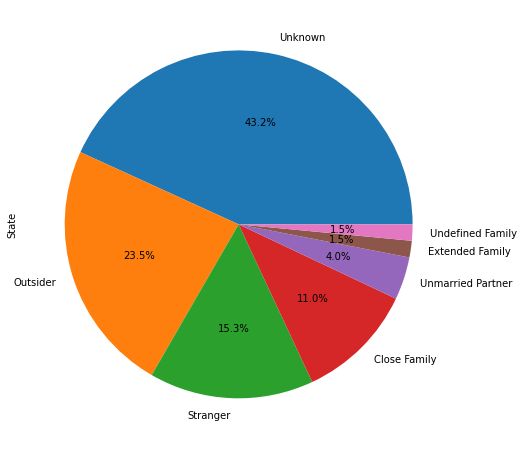

In [34]:
plt.figure(figsize=(18,8))
df.groupby('relationship_type').size().sort_values(ascending=False).plot(kind='pie', ylabel='State', autopct='%1.1f%%')


In [35]:
df.loc[(df['relationship_type'] == 'Unknown') & (df['crime_solved'] == 1)] 
#find rows with potential missing data - where the crime is solved but the age is zero


,agency_type,city,state,year,month,crime_type,crime_solved,victim_sex,victim_age,victim_race,...,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,count,relationship_type
9,Municipal Police,Anchorage,Alaska,1980,June,Murder or Manslaughter,1,Male,38,White,...,Male,40,Unknown,Unknown,Unknown,Firearm,1,2,1,Unknown
13,Municipal Police,Anchorage,Alaska,1980,August,Murder or Manslaughter,1,Male,20,Native American/Alaska Native,...,Male,49,White,Unknown,Unknown,Fall,1,1,1,Unknown
29,State Police,Juneau,Alaska,1980,April,Murder or Manslaughter,1,Male,18,Unknown,...,Male,61,Native American/Alaska Native,Unknown,Unknown,Shotgun,1,1,1,Unknown
35,State Police,Juneau,Alaska,1980,August,Murder or Manslaughter,1,Male,21,Native American/Alaska Native,...,Male,17,Native American/Alaska Native,Unknown,Unknown,Rifle,1,1,1,Unknown
36,State Police,Juneau,Alaska,1980,August,Murder or Manslaughter,1,Female,46,Native American/Alaska Native,...,Male,34,White,Unknown,Unknown,Rifle,1,1,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638415,Sheriff,Raleigh,West Virginia,2014,May,Murder or Manslaughter,1,Male,47,White,...,Male,34,White,Unknown,Unknown,Unknown,1,1,1,Unknown
638417,Sheriff,Raleigh,West Virginia,2014,November,Murder or Manslaughter,1,Male,998,Unknown,...,Male,34,White,Unknown,Unknown,Unknown,1,1,1,Unknown
638422,Municipal Police,Wood,West Virginia,2014,June,Murder or Manslaughter,1,Male,42,White,...,Male,58,White,Unknown,Unknown,Knife,1,1,1,Unknown
638434,State Police,McDowell,West Virginia,2014,October,Murder or Manslaughter,1,Male,50,White,...,Female,35,White,Unknown,Unknown,Firearm,2,3,1,Unknown


Still quite a lot of solved crimes with an Unknown relationship meaning we have more missing data. 

Now lets look at the Weapon column as i think we will do something similar here:

In [36]:
pd.unique(df['weapon']) # get unique values in this column

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

I can see there are several types of gun in here, Lets creat a new column and put all the guns under an umbrella category so we can run analysis:

In [37]:
d2 = {'Firearm': ['Handgun', 'Shotgun', 'Rifle', 'Firearm', 'Gun'],
     'Blunt Object': ['Blunt Object'],
     'Knife': ['Knife'],
     'Suffocation': ['Suffocation'],
     'Unknown': ['Unknown'], 'Poison': ['Poison'], 'Explosives': ["Explosives"],
     'Strangulation': ['Strangulation'], 'Fall': ['Fall'], 'Drowning': ['Drowning'],
     'Fire': ['Fire'], 'Drugs': ['Drugs'], 'Poison': ['Poison']}
# creat a dictionary to put all guns under an umbrella heading 

mapping2 = {v: k for k, l in d2.items() for v in l}

df['method'] = df['weapon'].map(mapping2) #overwrite the previous column and map our new values
df.head(10)

,agency_type,city,state,year,month,crime_type,crime_solved,victim_sex,victim_age,victim_race,...,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,count,relationship_type,method
0,Municipal Police,Anchorage,Alaska,1980,January,Murder or Manslaughter,1,Male,14,Native American/Alaska Native,...,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,1,1,1,Outsider,Blunt Object
1,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,1,Male,43,White,...,42,White,Unknown,Acquaintance,Strangulation,1,1,1,Outsider,Strangulation
2,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,...,0,Unknown,Unknown,Unknown,Unknown,1,1,1,Unknown,Unknown
3,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,1,Male,43,White,...,42,White,Unknown,Acquaintance,Strangulation,1,1,1,Outsider,Strangulation
4,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,...,0,Unknown,Unknown,Unknown,Unknown,1,2,1,Unknown,Unknown
5,Municipal Police,Anchorage,Alaska,1980,May,Murder or Manslaughter,1,Male,30,White,...,36,White,Unknown,Acquaintance,Rifle,1,1,1,Outsider,Firearm
6,Municipal Police,Anchorage,Alaska,1980,May,Murder or Manslaughter,1,Female,42,Native American/Alaska Native,...,27,Black,Unknown,Wife,Knife,1,1,1,Close Family,Knife
7,Municipal Police,Anchorage,Alaska,1980,June,Murder or Manslaughter,1,Female,99,White,...,35,White,Unknown,Wife,Knife,1,1,1,Close Family,Knife
8,Municipal Police,Anchorage,Alaska,1980,June,Murder or Manslaughter,0,Male,32,White,...,0,Unknown,Unknown,Unknown,Firearm,1,1,1,Unknown,Firearm
9,Municipal Police,Anchorage,Alaska,1980,June,Murder or Manslaughter,1,Male,38,White,...,40,Unknown,Unknown,Unknown,Firearm,1,2,1,Unknown,Firearm


In [38]:
pd.unique(df['method']) # find unique values under new column to ensure no nulls

array(['Blunt Object', 'Strangulation', 'Unknown', 'Firearm', 'Knife',
       'Fall', 'Drowning', 'Suffocation', 'Explosives', 'Fire', 'Drugs',
       'Poison'], dtype=object)

<AxesSubplot:ylabel='method'>

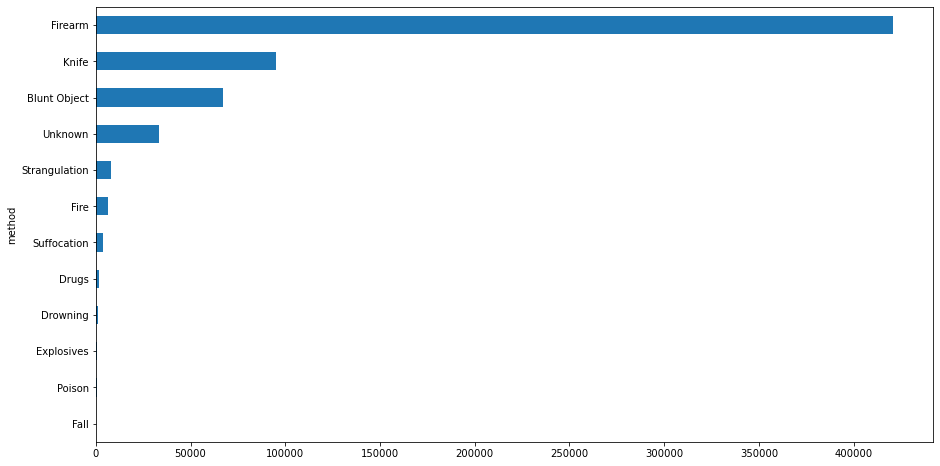

In [39]:
plt.figure(figsize=(15,8))
df.groupby('method').size().sort_values(ascending=True).plot(kind='barh', ylabel='State')


Wow, Firearm is by far the most common method of homicide. Lets take a quick look at Firearm Homicide across the years:

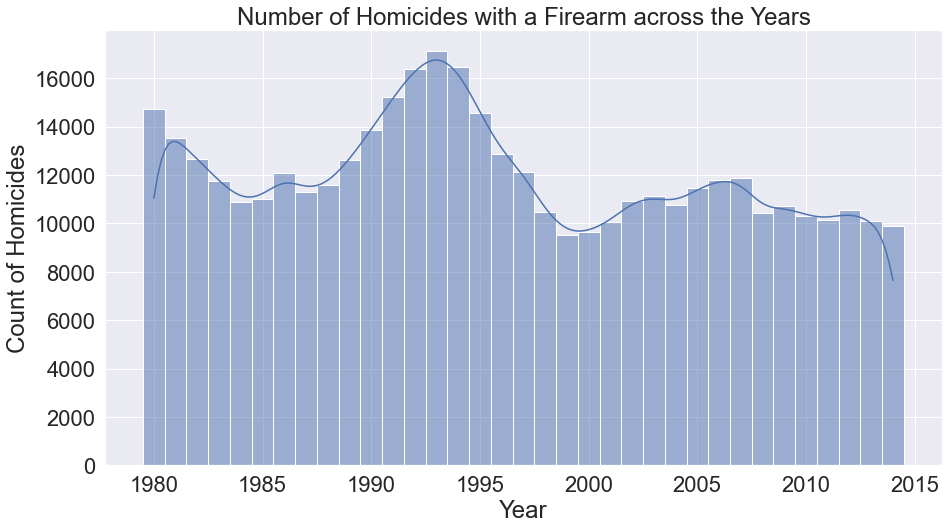

In [40]:
plt.figure(figsize=(15, 8)) # set plot size
sns.set(font_scale=2) # set font size
sns.set_style('darkgrid') # set a dark grid
meth = df[(df['method'] == 'Firearm')]
methChart = sns.histplot(data=meth, 
                         x='year',
                         discrete=True,
                         kde=True) # show the distribution of homicides with a firearm over the years 
methChart.set(xlabel='Year', ylabel='Count of Homicides', title='Number of Homicides with a Firearm across the Years');

In [41]:
df.head() # take a look at the first 5 rows 

,agency_type,city,state,year,month,crime_type,crime_solved,victim_sex,victim_age,victim_race,...,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,count,relationship_type,method
0,Municipal Police,Anchorage,Alaska,1980,January,Murder or Manslaughter,1,Male,14,Native American/Alaska Native,...,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,1,1,1,Outsider,Blunt Object
1,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,1,Male,43,White,...,42,White,Unknown,Acquaintance,Strangulation,1,1,1,Outsider,Strangulation
2,Municipal Police,Anchorage,Alaska,1980,March,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,...,0,Unknown,Unknown,Unknown,Unknown,1,1,1,Unknown,Unknown
3,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,1,Male,43,White,...,42,White,Unknown,Acquaintance,Strangulation,1,1,1,Outsider,Strangulation
4,Municipal Police,Anchorage,Alaska,1980,April,Murder or Manslaughter,0,Female,30,Native American/Alaska Native,...,0,Unknown,Unknown,Unknown,Unknown,1,2,1,Unknown,Unknown


In [42]:
df["victim_sex"].value_counts() #get the counts for each unique value

Male       494125
Female     143345
Unknown       984
Name: victim_sex, dtype: int64

In [43]:
df["perpetrator_sex"].value_counts() #get the counts for each unique value

Male       399541
Unknown    190365
Female      48548
Name: perpetrator_sex, dtype: int64

Perfect. The cleaning and some preliminary Analysis is done, lets move over to Tableau to look at some visualizations and see if we can identify some trends!

In [ ]:
df.to_csv('cleanData.csv')